<a href="https://colab.research.google.com/github/rawat999/tensorflow-coursera/blob/master/coursera_3308_Mutiple_LSTM_Layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.5.0


In [2]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompletePC0M53/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompletePC0M53/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompletePC0M53/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
tokenizer = info.features['text'].encoder

In [5]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_dataset.padded_batch(BATCH_SIZE)

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='binary_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(learning_rate=7e-06), 
              metrics=['accuracy'])

In [9]:
NUM_EPOCHS = 20
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/20
391/391 [==============================] - 120s 274ms/step - loss: 0.6931 - accuracy: 0.5026 - val_loss: 0.6931 - val_accuracy: 0.5130
Epoch 2/20
391/391 [==============================] - 106s 268ms/step - loss: 0.6930 - accuracy: 0.5307 - val_loss: 0.6929 - val_accuracy: 0.5373
Epoch 3/20
391/391 [==============================] - 105s 267ms/step - loss: 0.6927 - accuracy: 0.5587 - val_loss: 0.6927 - val_accuracy: 0.5557
Epoch 4/20
391/391 [==============================] - 106s 269ms/step - loss: 0.6922 - accuracy: 0.5821 - val_loss: 0.6921 - val_accuracy: 0.5742
Epoch 5/20
391/391 [==============================] - 107s 271ms/step - loss: 0.6910 - accuracy: 0.6052 - val_loss: 0.6904 - val_accuracy: 0.5936
Epoch 6/20
391/391 [==============================] - 107s 272ms/step - loss: 0.6864 - accuracy: 0.6266 - val_loss: 0.6825 - val_accuracy: 0.6161
Epoch 7/20
391/391 [==============================] - 107s 270ms/step - loss: 0.6136 - accuracy: 0.6881 - val_loss: 0.5497 -

In [10]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

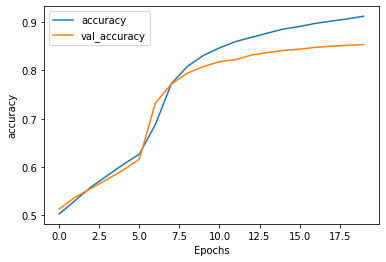

In [11]:
plot_graphs(history, 'accuracy')

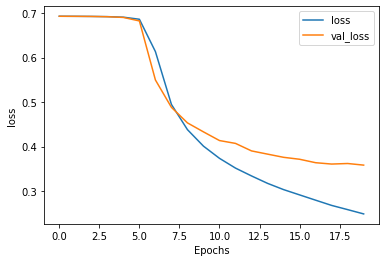

In [12]:
plot_graphs(history, 'loss')